<a href="https://colab.research.google.com/github/MariaM0ura/LightHouse/blob/main/Desafio_Cientista_de_Dados_Finalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Cientista de Dados - Lighthouse

##Importação de Dados

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud
import plotly.express as px
from scipy import stats

In [272]:
data_path = '/content/teste_indicium_precificacao.csv'
df = pd.read_csv(data_path)

In [273]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [274]:
# Descrição dos Dados
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [275]:
df.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


## Tratamento de Dados

In [276]:
#Os dados que não possui nome serão preenchidos com Anúncio Sem Título
df['nome'] = df['nome'].fillna('Anúncio Sem Título')

In [277]:
#Os dados que não possui host_name serão preenchidos com Anúncio Sem Título
df['host_name'] = df['host_name'].fillna('Host Não Informado')

In [278]:
# Dados que possui NaN como numero de reviews por mes será preenchidos com 0
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [279]:
df['ultima_review']

,ultima_review
0,2019-05-21
1,NaN
2,2019-07-05
3,2018-11-19
4,2019-06-22
...,...
48889,NaN
48890,NaN
48891,NaN
48892,NaN


In [280]:
df = df.dropna(subset=['ultima_review'])

In [281]:
df['ultima_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')

In [282]:
df.isnull().sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [283]:
df.reset_index(drop=True, inplace=True)

In [284]:
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38837,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
38838,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
38839,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
38840,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


##Análise Exploratória

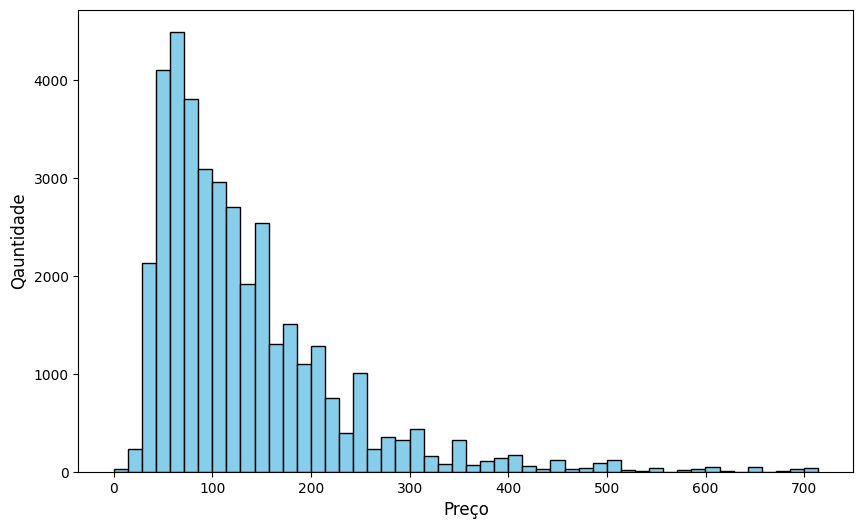

In [285]:
z_scores = np.abs(stats.zscore(df['price']))

df_sem_outliers = df[z_scores < 3]

plt.figure(figsize=(10, 6))
plt.hist(df_sem_outliers['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Qauntidade', fontsize=12)
plt.show()

In [286]:
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)
HeatMap(data=df[['latitude', 'longitude', 'price']].values, radius=15).add_to(mapa)
mapa

In [287]:
media_precos = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("Média de preços por tipo de quarto:")
print(media_precos)

Média de preços por tipo de quarto:
room_type
Entire home/apt    196.294068
Private room        83.977412
Shared room         63.213948
Name: price, dtype: float64


In [288]:
grouped_data = df.groupby(['bairro_group', 'room_type'])['price'].mean().reset_index()

grafico = px.bar(
    grouped_data,
    x='bairro_group',
    y='price',
    color='room_type',
    barmode='group',
    text='price',
    labels={
        'bairro_group': 'Bairros',
        'price': 'Preço Médio ',
        'room_type': 'Tipo de Quarto'
    },
)

grafico.update_traces(texttemplate='%{text:.2f}', textposition='outside')
grafico.update_layout(xaxis_title='Bairro', yaxis_title='Preço Médio', legend_title='Tipo de Quarto')
grafico.show()

<Axes: xlabel='price', ylabel='Count'>

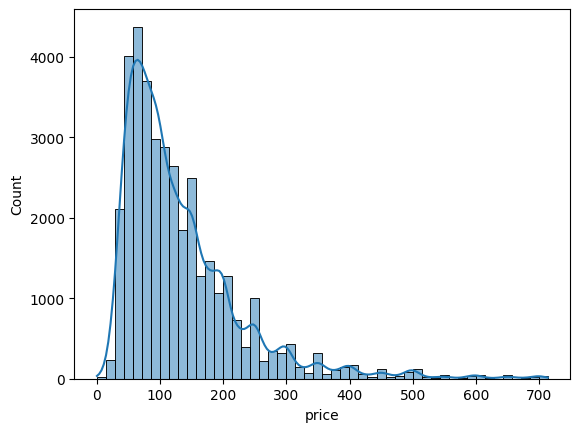

In [289]:
z_scores = np.abs(stats.zscore(y))
y = y[z_scores < 3]
X = X.loc[y.index]

z_scores = np.abs(stats.zscore(X['numero_de_reviews']))
X = X[z_scores < 3]
y = y.loc[X.index]

sns.histplot(y, bins=50, kde=True)

##1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

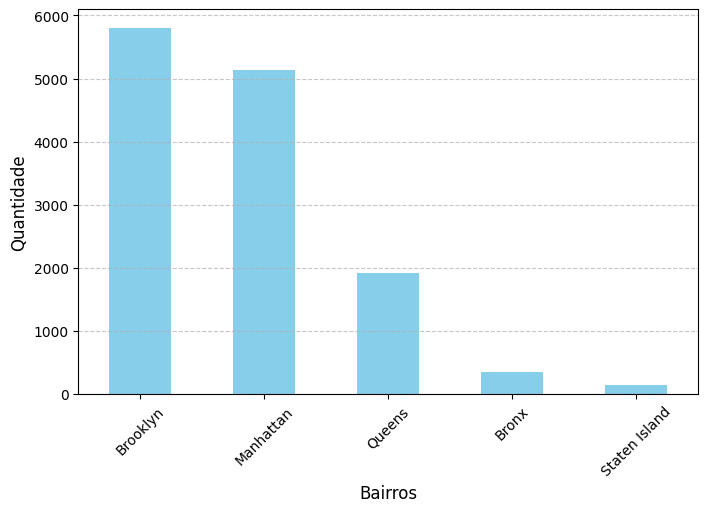

In [290]:
melhor_aluguel = df[
    (df['reviews_por_mes'] > df['reviews_por_mes'].median()) &
    (df['price'] > 50) &
    (df['price'] < 200)
]

melhor_bairro = melhor_aluguel['bairro_group'].value_counts()


melhor_bairro.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.xlabel('Bairros', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


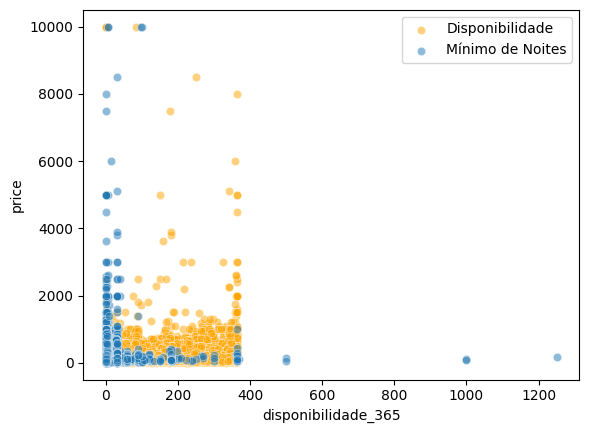

In [291]:
sns.scatterplot(data=df, x='disponibilidade_365', y='price', alpha=0.5, color='orange')
sns.scatterplot(data=df, x='minimo_noites', y='price', alpha=0.5)

plt.legend(['Disponibilidade', 'Mínimo de Noites'])
plt.show()

## 3. Existe algum padrão no texto do nome para lugares de mais alto valor?


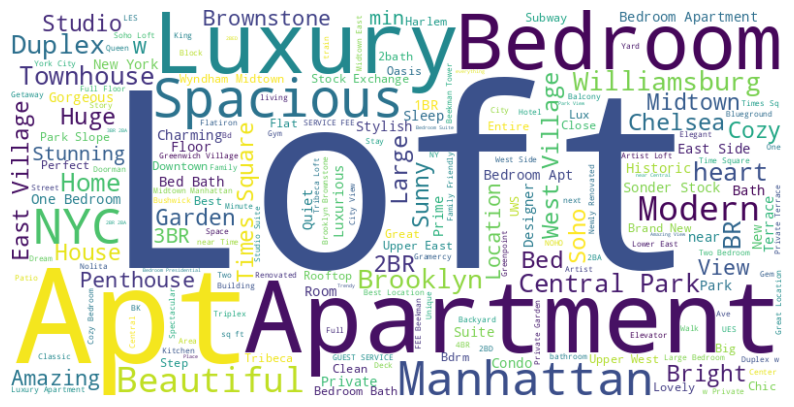

In [292]:
top_10 = df[df['price'] > df['price'].quantile(0.9)]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_10['nome']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Previsão de Preços - XGBoost

###Importação

In [293]:
!pip install optuna

In [294]:
pip install --upgrade xgboost scikit-learn

In [295]:
import xgboost
print(xgboost.__version__)

2.1.3


In [319]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from joblib import Memory
import xgboost as xgb
import pickle

###Separando Dados

In [297]:
X = df[['bairro_group', 'room_type', 'numero_de_reviews', 'minimo_noites', 'reviews_por_mes', 'disponibilidade_365']]

In [298]:
y = df['price']

### Pré-processamento de Dado

In [299]:
categorical_features = ['bairro_group', 'room_type']

In [300]:
numerical_features = ['numero_de_reviews', 'minimo_noites', 'disponibilidade_365']

### Modelo de treinamento

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:
for cat_col in categorical_features:
    X_train[cat_col] = X_train[cat_col].astype('category')
    X_test[cat_col] = X_test[cat_col].astype('category')

In [303]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [304]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42
    }
    model = xgb.XGBRegressor(**params, enable_categorical=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

[I 2025-01-31 18:46:04,976] A new study created in memory with name: no-name-27165850-6c83-4eff-a3b6-6862669c22a4
[I 2025-01-31 18:46:05,847] Trial 0 finished with value: 58.75358963012695 and parameters: {'n_estimators': 78, 'learning_rate': 0.20289971072133423, 'max_depth': 4, 'subsample': 0.7950924103077663, 'colsample_bytree': 0.9276080265192355}. Best is trial 0 with value: 58.75358963012695.
[I 2025-01-31 18:46:06,467] Trial 1 finished with value: 57.08693313598633 and parameters: {'n_estimators': 81, 'learning_rate': 0.054845183265974866, 'max_depth': 4, 'subsample': 0.7705563161772899, 'colsample_bytree': 0.9277686505005942}. Best is trial 1 with value: 57.08693313598633.
[I 2025-01-31 18:46:07,133] Trial 2 finished with value: 59.53585433959961 and parameters: {'n_estimators': 159, 'learning_rate': 0.1993929336790273, 'max_depth': 3, 'subsample': 0.5422514995341146, 'colsample_bytree': 0.9374708313302265}. Best is trial 1 with value: 57.08693313598633.
[I 2025-01-31 18:46:28,5

In [305]:
best_params = study.best_params

In [306]:
num_rounds = best_params.pop("n_estimators")  # Número de iterações
model = xgb.train(best_params, dtrain, num_boost_round=num_rounds)

In [307]:
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [308]:
y_pred = model.predict(dtest)

### Resultados

In [309]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)

MAE: 56.97710418701172


### Corelação Entre os Dados

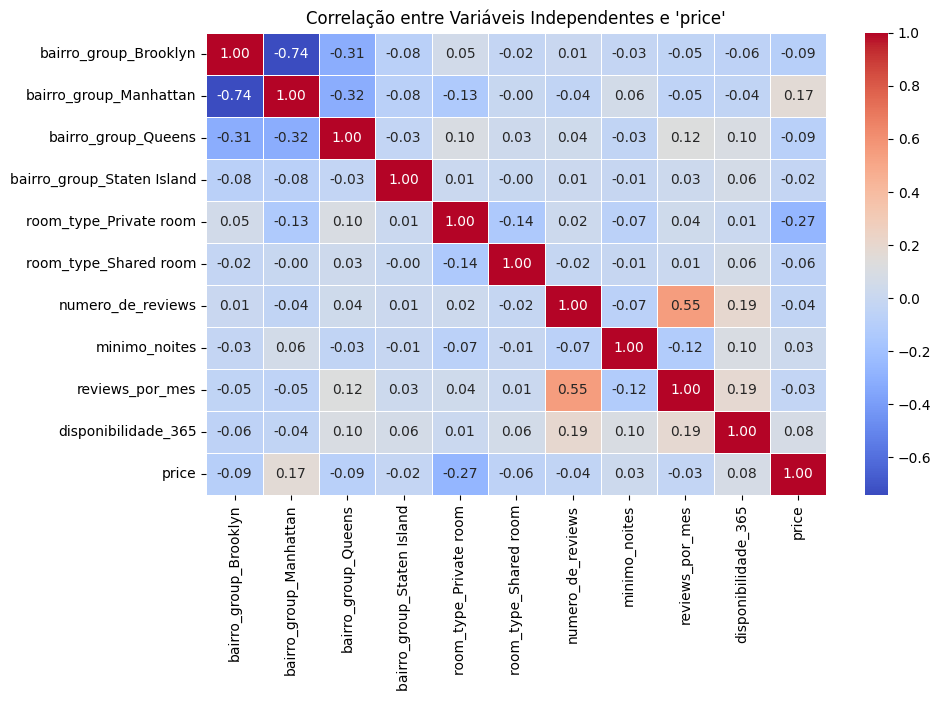

In [310]:
df_encoded = pd.get_dummies(df[['bairro_group', 'room_type']], drop_first=True)

df_for_corr = df_encoded.join(df[['numero_de_reviews', 'minimo_noites', 'reviews_por_mes', 'disponibilidade_365', 'price']])

correlation = df_for_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Variáveis Independentes e 'price'")
plt.show()

### Inserindo novo valor no Dataset

In [320]:
# Modelo Salvo em formato .pkl
with open("modelo_xgb.pkl", "wb") as f:
    pickle.dump(model, f)

In [321]:
with open("modelo_xgb.pkl", "rb") as f:
    modelo_carregado = pickle.load(f)

In [322]:
novo_apartamento = pd.DataFrame([{
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}])

In [323]:
colunas_treinadas = ['bairro_group', 'room_type', 'numero_de_reviews', 'minimo_noites', 'reviews_por_mes', 'disponibilidade_365']
novo_apartamento = novo_apartamento[colunas_treinadas]

In [327]:
novo_apartamento['bairro_group'] = novo_apartamento['bairro_group'].astype('category').cat.codes;
novo_apartamento['room_type'] = novo_apartamento['room_type'].astype('category').cat.codes;

In [325]:
dnovo = xgb.DMatrix(novo_apartamento)

In [326]:
preco_previsto = modelo_carregado.predict(dnovo)[0]

print(f"Preço previsto para o apartamento: ${preco_previsto:.2f}")

Preço previsto para o apartamento: $169.80
